# Week 2

## Activity 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
def diffyqs(t, curr_vals, omega2):
    # 2 first-order differential equations for a SHO
    # first 2 arguments are always t and curr_vals, which are followed by any parameters of your ODEs
    x, v = curr_vals   # unpack current values
    
    vdot = -omega2 * x # calculate derivative

    return v, vdot # return derivatives

In [ ]:
tmax = 15
dt = 0.1
tspan = (0, tmax)         # time span
t = np.arange(0, tmax, dt) # specific times to return solutions for

In [ ]:
omega2 = 2
initial_condition = [1, 0] # pull back 1m, no initial velocity

In [ ]:
solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2, ), method="RK45")


In [ ]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")
RK45solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK45")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 4))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*')
plt.title("Long term SHO motion with RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t,RK45solved.y[0], label = "Numerical Solution (RK45", marker='s')
plt.title("Long term SHO motion with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

Next part

$z = c\rho^2$

$$
\dot v = \ddot \rho = \frac{\rho \dot \phi^2 - 4 c^2 \rho \dot \rho^2 - 2cg\rho }{1 + 4c^2 \rho^2} \\
= \frac{\rho \omega^2 - 4 c^2 \rho v^2 - 2cg\rho }{1 + 4c^2 \rho^2}\\


\dot \omega = \ddot \phi = -2\frac{\dot \rho \dot \phi}{\rho}\\
= -2\frac{v \omega}{\rho}\\

\omega = \dot \phi 
$$

In [ ]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, g, c):

    r, v, theta, omega = curr_vals
    
    vdot = (r * omega**2 - 4 * c**2 * r * v**2 - 2 * c *g * r)/(1+ 4 * c**2 * r**2)

    omegadot = -2 * v * omega / r

    return v, vdot, omega, omegadot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 40
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
c = 1
g = 1
x0 = [2.6,0,0,4] #r, v, theta, omega

# 4. Call Integrator
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, c, ), method="RK45")

In [ ]:
def parabaloid(x, y, alpha=1.):
    # function of a paraboloid in Cartesian coordinates
    return alpha * (x**2 + y**2)

def cylindrical_to_cartesian(r, th, alpha=1.):
    # convert back to cartesian coordinates for ease of plotting
    r = np.array(r)
    th = np.array(th)
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y,parabaloid(x, y, alpha)

def plot_solution(solved):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.plot3D(xtraj, ytraj, ztraj, c = "#18453B")
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xtraj[0], ytraj[0], ztraj[0])
    plt.show()

plot_solution(solved)

In [ ]:
from matplotlib.animation import PillowWriter

def plot_video(solved, tmax, dt):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    frames = tmax / dt
    metadata = {'title': 'Movie', 'artist': 'AndrewKoren'}
    capture_rate = 50 # captures 1/rate frames
    writer = PillowWriter(fps=frames/capture_rate)
    with writer.saving(fig, 'chaos.gif', 100):
        for tval in range(int(frames)):

            
            writer.grab_frame()
    
    
#plot_video(solved)

# Week 3

Day 1: SHO

1. 1D oscillator

$\dot x = x^2 -1 $

For $x<1$ it will move to $x=-1$, for $x>1$ it will fly away. At x=0 it will be stable. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 11, 0.8)
x = np.arange(-2, 2, 0.4)

# Make grid
T, X = np.meshgrid(t, x)

# calculate derivative (dt is const so just use ones)
dx = X**2 - 1
dt = np.ones(dx.shape)

# plot
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.quiver(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.subplot(1,2,2)
plt.streamplot(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.suptitle("Slope Field")
plt.show()

Analytical solution:

$$
\dot x = x^2 -1 \\
x = \int \dot x dx = \frac{1}{3} x^3 - x + c \\
\ddot x = 2x
$$

In [ ]:
c = 0

def velocity(x):
    return x**2 - 1

def accel(x):
    return 2*x

def positionf(x):
    return x**3/3 - x + c

x = np.arange(-2, 2, 0.4)

plt.plot(x,[0 for i in x])
plt.plot(x,velocity(x))
plt.plot(x,accel(x))
plt.plot(x,positionf(x))
plt.show()


2. phase space sho

$$
\dot x = v_x \\
\dot v_x = -\omega^2 x
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.4)
v = np.arange(-3, 3, 0.4)

# Make grid
X, V = np.meshgrid(x, v)

def oscillator(X, V, params):
    omega = params
    xdot, vdot = [V, - omega ** 2 * X]
    return xdot, vdot

def get_points(X, V, func, params):
    dx, dv =  np.zeros(X.shape), np.zeros(V.shape)

    xlim, ylim = X.shape
    for i in range(xlim):
        for j in range(ylim):
            xloc = X[i,j]
            vloc = V[i,j]
            dx[i,j], dv[i,j] = func(xloc, vloc, params)
    
    return(dx, dv)

dx, dv = get_points(X, V, oscillator, 1)

def make_phase_space(X, V, dx, dv):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.quiver(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.subplot(1,2,2)
    plt.streamplot(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.suptitle("Phase Space")
    plt.show()
make_phase_space(X, V, dx, dv)

Pendulum

$$
\mathcal{L}  = \frac{1}{2}I \omega^2 + mgh \\
h = L - L\cos(\theta) = 2L \sin^2\left(\frac{\theta}{2}\right) \\
I = mL^2 \\
\mathcal{L} = \frac{1}{2} mL^2 \dot \theta^2 + mgL(1-\cos(\theta))$$

Now we do the solving part

$$
\frac{\partial \mathcal{L}}{\partial \theta} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot \theta} \\

$$

$$
\frac{\partial \mathcal{L}}{\partial \dot \theta} = mL^2 \dot \phi \\
\frac{d}{dt} mL^2 \dot \phi = mL^2 \ddot \phi \\
\frac{\partial \mathcal{L}}{\partial  \theta} = mgL\sin(\theta) \\
mL^2 \ddot \phi = mgL \sin(\theta) \\
\ddot \phi = \frac{g}{L} \sin(\theta)
$$

Now we can make our function

In [ ]:
def pendulum(theta, omega, params:list):
    g, L, b = params
    dtheta, domega = [omega, g / L * np.sin(theta) - b*omega]
    return dtheta, domega

x = np.arange(-5, 5, 0.6)
v = np.arange(-5, 5, 0.6)
X, V = np.meshgrid(x, v)


dx, dv = get_points(X, V, pendulum, [9.81, 4, 1])

make_phase_space(X, V, dx, dv)

Jacobian:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial \theta} &\frac{\partial f}{\partial \dot \theta} \\ \frac{\partial g}{\partial \theta} & \frac{\partial g}{\partial \dot \theta} 
\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ \frac{g}{L}\cos(\theta) & 0 \end{bmatrix}
$$

Damped:

$$
J = \begin{bmatrix} 0 & 1 \\ \frac{g}{L}\cos(\theta) & -b \end{bmatrix}
$$



Eigenvalues
$$
\lambda^2 - \frac{g}{L} \cos (\theta) = 0 \\
\lambda = \pm \sqrt{\frac{g}{L} \cos (\theta)}
$$
Dampled
$$
-b\lambda^2 - \frac{g}{L} \cos (\theta) = 0 \\
\lambda = \pm \sqrt{-\frac{g}{bL} \cos (\theta)}
$$

## Day 2 - doing an ODE

$\ddot x = - \mu (x^2-1)\dot x - x$

Note that this equation is simply the harmonic oscillator when $ \mu=0$. The strange $ -\mu(x^2-1)\dot{x} $ term represents damping, but this damping behaves strangely, because when $ |x |<1$, it is negative damping, that is it boosts oscillations smaller than $1$, while still slowing down oscillations larger than $ 1$.</p>
<p>Now we play the usual game of trying to figure out how this system behaves:</p>
<p>1. Identify the fixed point of this system. Follow the linearization procedure to characterize it.</p>
<p>2. Edit the code below to produce a phase plot for the Van der Pol oscillator. This code also numerically integrates a trajectory and plots it. Add a second trajectory and plot that as well.</p>
<p>3. What happens to phase space when you change the value of $\mu$  What if you make it negative?</p>
<p>4. What behavior do you notice here that’s different than you’ve seen before? What is attracting the trajectories?</p>
<p>5. Based on the phase space diagram, what do you expect actual trajectories to look like in $x$ vs $t$ space? Use the numerically integrated trajectories to plot that.&nbsp;</p>


# Week 4

Some important notes:

Fixed points occur when $\frac{dU}{dx} = 0$

Phase portraits are dx dv models for various values of x and v (or other values), they are made by plugging values into a diffeq






## Duffing oscillator speed run

$$
\ddot x = - \delta \dot x - \alpha x - \beta x^3 + \gamma \cos(\omega t)
$$

In [ ]:
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
from scipy.integrate import solve_ivp

fig = plt.figure()


# generate each frame

def duffing(t, p0, params):
    x, v = p0
    alpha, beta, delta, gamma, omega = params
    dx = v
    dv = -delta * v - alpha * x - beta * x**3 + gamma * cos(omega * t)
    return dx, dv

alpha = -1
beta = 1
delta = 1
gamma = 5
omega = pi

parameters = [alpha, beta, delta, gamma, omega]


def generate_phase_space(x_lim, v_lim, grid_size, parameters, t):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = duffing(t, (X,V), parameters)
    
    return X, V, dX, dV

x_lim = (-3, 3)
v_lim = (-5, 5)
grid_size = 20

X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, parameters, 0)

#field1 = plt.streamplot(X, V, dX, dV)
field1 = plt.quiver(X, V, dX, dV)


# creating the animation

metadata = dict(title='Movie', artist='AndrewKoren')
writer = PillowWriter(fps=15, metadata=metadata)

data = []

initial_condition = [2, 2]
end = 20
dt = 0.1

tspan = np.arange(0, end, dt)
solution = solve_ivp(duffing, (0, end), initial_condition, t_eval = tspan, args=[parameters])

with writer.saving(fig, 'duffing.gif', 100):
    for i, tval in enumerate(tspan):
        
        X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, parameters, tval)
        plt.title(f't = {tval*omega/(2*np.pi):.2f} periods')
        plt.xlabel('position')
        plt.ylabel('velocity')

        #plt.streamplot(X, V, dX, dV, color='blue')
        field1.set_UVC(dX, dV)

        plt.plot(solution.y[0][:i+1], solution.y[1][:i+1], color='red')
        writer.grab_frame()
        #plt.cla()


In [ ]:
solution

plt.plot(solution.t, solution.y[0])
plt.plot(solution.t, solution.y[1])

plt.plot(solution.y[0], solution.y[1])

## Electrodynamics

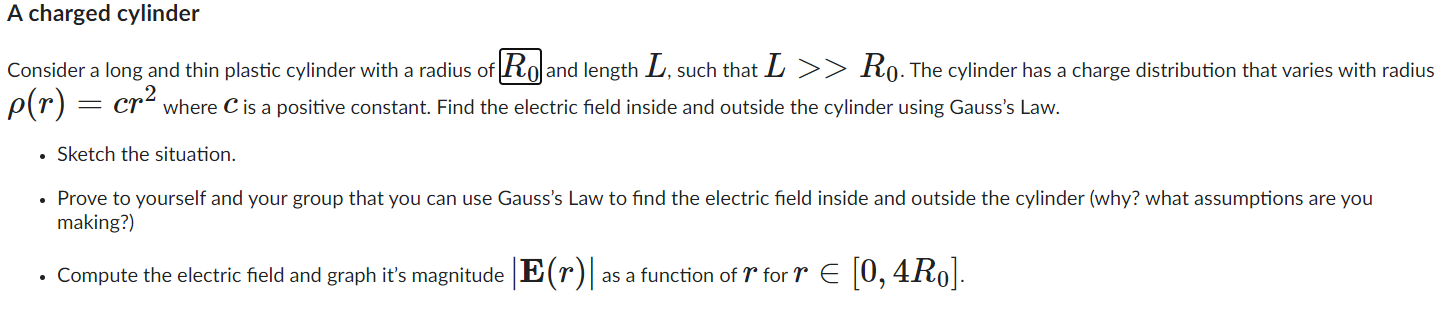

Long cylinder -> $\frac{dE}{dz} = 0$

Electric field at surface: Circle circumfrence * length

$$
E \int \int da = 2\pi r l * E 
$$

Enclosed charge: similar for $r < R_0$

$$
\frac{1}{\epsilon_0}\int \int \int \rho dv = \int_0^l \int_0^{2\pi} \int_0^r cr^3 dr d\theta dz \\
= \frac{1}{\epsilon_0}2 \pi l * \frac{cr^4}{4}
$$

Put them together

$$
2\pi r l E = 2\pi r l * \frac{cr^3}{4\epsilon_0} \\
E = \frac{cr^3}{4\epsilon_0}
$$

Outside cylinder:

$$2 \pi r l E = 2\pi l * \frac{cR_0^4}{4} \\
E = \frac{cR_0^4}{4\epsilon_0r}
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def e_field(r):
    R0 = 1
    c = 1
    return c * R0**4 / (4*r)

points = np.linspace(0.01, 4, 1000)
e_points = e_field(points)

plt.plot(points, e_points)
plt.xlabel(r'distance * $\frac{1}{R_0}$')
plt.ylabel(r'field strength * $\frac{c R_0^4}{4 \epsilon_0}$ ')

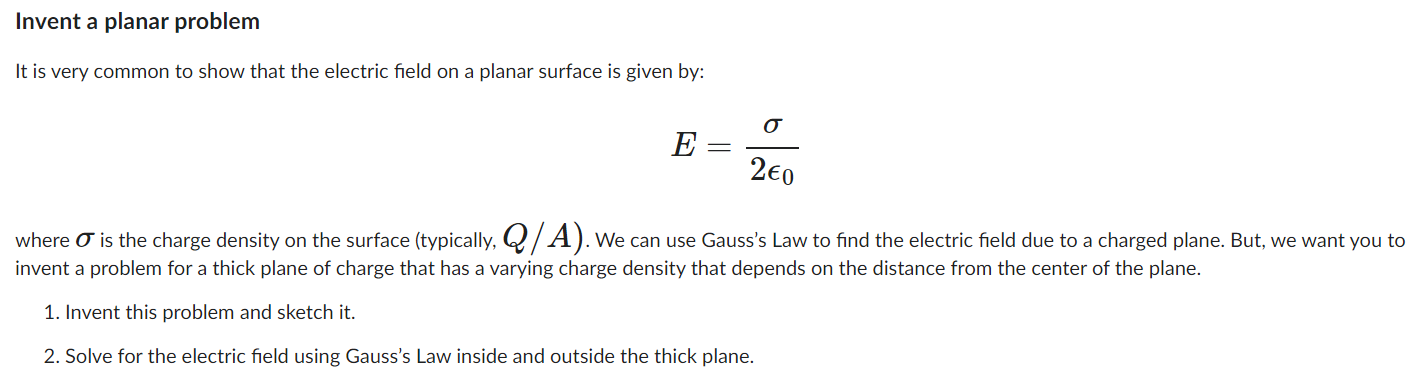

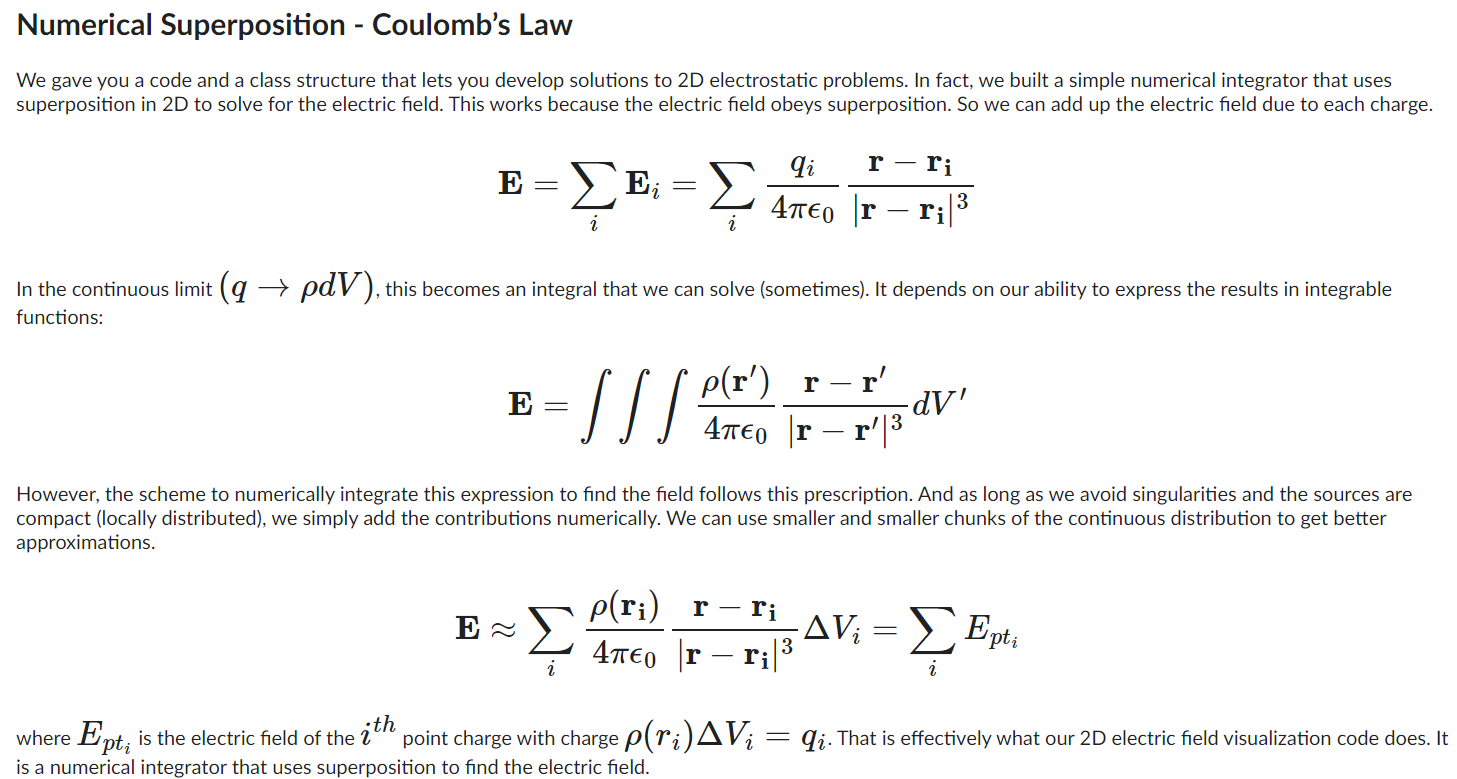

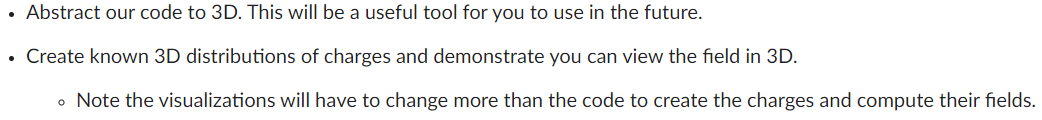

In [ ]:
## run to import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

def electric_field(charge, x_points, y_points, x_charge=0, y_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            r_x = x_points[i, j] - x_charge
            r_y = y_points[i, j] - y_charge
            r_magnitude = np.sqrt(r_x**2 + r_y**2)
            if r_magnitude != 0:  # Avoid division by zero
                r_unit_x = r_x / r_magnitude
                r_unit_y = r_y / r_magnitude
                E_x[i, j] = k * charge * r_unit_x / r_magnitude**2
                E_y[i, j] = k * charge * r_unit_y / r_magnitude**2
    
    return E_x, E_y

def plot_electric_field(X, Y, E_x, E_y, stream_color='b'):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First Subplot - Quiver Plot
    axs[0].quiver(X, Y, E_x, E_y, scale=1e6, color='r')
    axs[0].set_title('Quiver Plot')
    axs[0].set_xlabel('x [m]')
    axs[0].set_ylabel('y [m]')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Second Subplot - Stream Plot
    axs[1].streamplot(X, Y, E_x, E_y, color=stream_color, linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
    axs[1].set_title('Stream Plot')
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('y [m]')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Third Subplot - Color Scaled Quiver Plot
    magnitude = np.sqrt(E_x**2 + E_y**2)
    colors = np.log(magnitude)
    strm = axs[2].streamplot(X, Y, E_x, E_y, color=colors, cmap = cm.inferno)
    axs[2].set_title('Color Scaled Stream Plot')
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    axs[2].grid(color='gray', linestyle='--', linewidth=0.5)
    # Add a colorbar to the plot
    cbar = plt.colorbar(strm.lines)
    cbar.set_label(r'$\log{\left|\mathbf{E}\right|}$')

    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

## Set Grid of Points
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A point charge
charge = 1e-6  # C

E_x, E_y = electric_field(charge, X, Y)
plot_electric_field(X, Y, E_x, E_y)

class Charge:
    def __init__(self, q, x, y):
        self.q = q  # charge value
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate

# Creating instances of Charge class
charge1 = Charge(1e-6, -1, 1)  # e.g. Charge of 1 μC at (0, 0)
charge2 = Charge(-1e-6, 1, 1)  # e.g. Charge of -1 μC at (1, 0)
charge3 = Charge(1e-6, 1, -1)  # e.g. Charge of 1 μC at (0, 1)
charge4 = Charge(-1e-6, -1, -1)  # e.g. Charge of -1 μC at (1, 1)

# Storing instances in a list
charges = [charge1, charge2, charge3, charge4]

# Iterating over the list of charges
for charge in charges:
    print(f"Charge: {charge.q} C, Location: ({charge.x}, {charge.y})")

Making stuff 3D

In [ ]:
## run to import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

def electric_field(charge, x_points, y_points, z_points, x_charge=0, y_charge=0, z_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    E_z = np.zeros_like(z_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            for zed in range(z_points.shape[2]):
                r_x = x_points[i, j, zed] - x_charge
                r_y = y_points[i, j, zed] - y_charge
                r_z = z_points[i, j, zed] - z_charge
                r_magnitude = np.sqrt(r_x**2 + r_y**2 + r_z**2)
                if r_magnitude != 0:  # Avoid division by zero
                    r_unit_x = r_x / r_magnitude
                    r_unit_y = r_y / r_magnitude
                    r_unit_z = r_z / r_magnitude
                    E_x[i, j, zed] = k * charge * r_unit_x / r_magnitude**2
                    E_y[i, j, zed] = k * charge * r_unit_y / r_magnitude**2
                    E_z[i, j, zed] = k * charge * r_unit_z / r_magnitude**2
    
    return E_x, E_y, E_z

def plot_electric_field(fig, X, Y, Z, E_x, E_y, E_z, stream_color='b'):
    ax = fig.add_subplot(projection='3d')
    
    # Just-1-subplot
    ax.quiver(X, Y, Z, E_x, E_y, E_z, length=0.3, normalize=True, color='r')
    ax.set_title('Quiver Plot')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('z [m]')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
        
    plt.tight_layout()  # Adjust spacing between subplots

class Charge:
    def __init__(self, q, x, y, z):
        self.q = q  # charge value
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate
        self.z = z  # z-coordinate

In [ ]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
z = np.linspace(-1, 1, 5)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

E_x, E_y, E_z = electric_field(1e-6, X, Y, Z)
plot_electric_field(X, Y, Z, E_x, E_y, E_z)

In [ ]:
from matplotlib.animation import PillowWriter

fig = plt.figure()

charge1 = Charge(1e-6, -1, 1, 0.5)  # e.g. Charge of 1 μC at (0, 0)
charge2 = Charge(-1e-6, 1, 1, 1)  # e.g. Charge of -1 μC at (1, 0)
charge3 = Charge(1e-6, 1, -1, -0.5)  # e.g. Charge of 1 μC at (0, 1)
charge4 = Charge(-1e-6, -1, -1, -1)  # e.g. Charge of -1 μC at (1, 1)

charges = [charge1, charge2, charge3, charge4]

## Set up the space again
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(-2, 2, 10)


metadata = dict(title='Movie', artist='AndrewKoren')
writer = PillowWriter(fps=1, metadata=metadata)

with writer.saving(fig, '3d-field.gif', 100):
    for i, xval in enumerate(x):

        redlayer = np.meshgrid(x[:i], y, z)
        #cyanlayer = np.meshgrid(x[i], y, z)

        X, Y, Z = redlayer
        ## Set the total electric field to zero
        E_T_x = np.zeros_like(X)
        E_T_y = np.zeros_like(Y)
        E_T_z = np.zeros_like(Z)
        ## Calculate the electric field due to each charge
        for charge in charges:
            E_x, E_y, E_z = electric_field(charge.q, X, Y, Z, charge.x, charge.y, charge.z)
            E_T_x += E_x
            E_T_y += E_y
            E_T_z += E_z
        plot_electric_field(fig, X, Y, Z, E_T_x, E_T_y, E_T_z)
        
        plt.xlim(-2,2)
        writer.grab_frame()


# Week 5

How accurate is the infinite plane approximation?

### analytical solution - infinite plane

$$
E = \frac{\sigma}{2\epsilon_0} \\
\sigma = 10^{-10} \\
E = \frac{10^{-10}}{2\epsilon_0} = 5.65
$$

In [ ]:
E_theory = 10**(-10)/(2*8.854187817e-12)
E_theory

In [ ]:
from numpy.linalg import norm

def electric_field_test(charge, x_point, y_point, z_point, x_charge, y_charge):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = 0
    E_y = 0
    E_z = 0
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_charge.shape[0]):
        for j in range(y_charge.shape[1]):
            r_x = x_point - x_charge[i, j]
            r_y = y_point - y_charge[i, j]
            r_z = z_point

            r_magnitude = np.sqrt(r_x**2 + r_y**2 + r_z**2)
            if r_magnitude != 0:  # Avoid division by zero
                r_unit_x = r_x / r_magnitude
                r_unit_y = r_y / r_magnitude
                r_unit_z = r_z / r_magnitude
                
                E_x += k * charge * r_unit_x / r_magnitude**2
                E_y += k * charge * r_unit_y / r_magnitude**2
                E_z += k * charge * r_unit_z / r_magnitude**2
                
    
    return E_x, E_y, E_z



x = np.linspace(0, 200, 3160)
y = np.linspace(0, 200, 3160)
X, Y = np.meshgrid(x, y)

sigma = 10**(-10)

area = x[-1] * y[-1]
total_charge = sigma*area
points = X.shape[0] * X.shape[1]
point_charge = total_charge/points

result = electric_field_test(point_charge, 100, 100, 1, x_charge=X, y_charge=Y)

E_actual = result[2]

Error = (E_theory - E_actual)/(E_theory)
print(Error)

$$
\mathcal{R} = (-R\cos(\theta), -R\sin(\theta), z)  = R\left(\cos(\theta), \sin(\theta), \frac{z}{R}\right)\\
|\mathcal{R}| = R\sqrt{\cos^2(\theta)+\sin^2(\theta) + \frac{z^2}{R^2}} = R\sqrt{1+\frac{z^2}{R^2}}\\
$$
Next is electric field
$$
E(r) = \frac{1}{4\pi\epsilon_0}\int_0^{2\pi} \frac{\mathcal{\lambda R}}{|\mathcal{R}|^3} Rd\theta \\
= \frac{\lambda}{4\pi\epsilon_0}\int_0^{2\pi} \frac{R\left(\cos(\theta)\hat x +  \sin(\theta) \hat y + \frac{z}{R} \hat z\right)}{\left(\sqrt{R^2+z^2}\right)^3} Rd\theta \\
=\frac{\lambda}{4\pi\epsilon_0}\int_0^{2\pi} \frac{Rz \hat z}{\left(\sqrt{R^2+z^2}\right)^3} d\theta 
= \frac{\lambda }{2\epsilon_0}\frac{Rz}{\left(\sqrt{R^2+z^2}\right)^3}
$$

In [ ]:
import sympy as s

Q, R, z, k = s.symbols('Q R z k')

lam = Q/(2*s.pi*R)
theta = s.symbols('theta')


In [ ]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

Rsep = -R * s.cos(theta) * N.i - R * s.sin(theta) * N.j + z * N.k

Rmag = s.sqrt(Rsep.dot(Rsep))

dE = k*lam*Rsep/(Rmag**3)

int_dE = s.integrate(dE, (theta, 0, 2*s.pi))

int_dEk = int_dE.dot(N.k)

int_dEk.evalf()

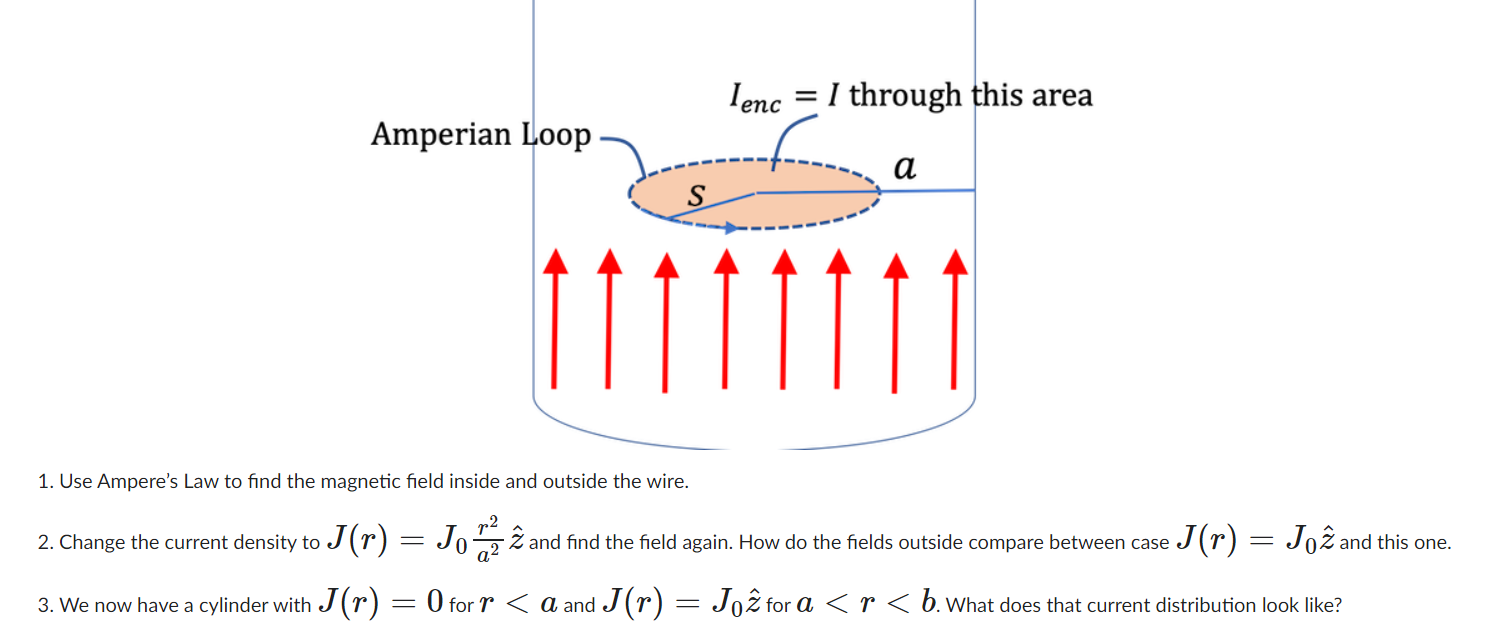

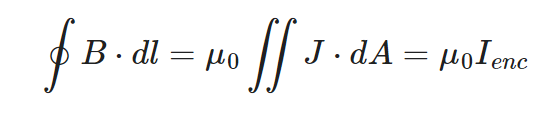

$dl(r) = rd\theta$ and $I_{enc} = \int_S J \cdot dA$. Just find current and magnetic field is simple.


Inside the wire: 

$$
\oint B \cdot dl = B \int_0^{2\pi} r d\theta = 2\pi r B \\
\mu_0 \int_0^r \int_0^{2\pi} J_0 r d\theta dr = \mu_0J_0 2\pi \frac{r^2}{2} \\
2\pi r B = J_0 2\pi \mu_0\frac{r^2}{2} \\
B(r) = \frac{\mu_0J_0 r}{2} \\
$$

Outside the wire:
$$
2\pi r B = J_0 2\pi \mu_0\frac{a^2}{2} \\
B(r)=\frac{\mu_0J_0 a^2}{2r}
$$


Part 2: $J(r) = J_0 \frac{r^2}{a^2} \hat z$

Inside:
$$
\mu_0 \int_0^r \int_0^{2\pi} J(r) r d\theta dr = \mu_0 \frac{J_0}{a^2} \int_0^r \int_0^{2\pi} r^3 d\theta dr = 2\pi \frac{J_0 r^4}{4a^2} \\
B(r) = \frac{J_0 r^3}{4a^2} \\
$$

Outside:
$$
B(r) = \frac{J_0 a^4}{4ra^2} = \frac{J_0 a^2}{4r}
$$

# Week 6

Laplacian

$$
\nabla^2 \Phi(x, y, z) = \frac{\partial^2 \Phi}{\partial^2 x} + \frac{\partial^2 \Phi}{\partial^2 y} + \frac{\partial^2 \Phi}{\partial^2 z}
$$
The assumption: $\Phi(x, y, z) = X(x) Y(y) Z(z) $
$$
YZ\frac{\partial^2 X}{\partial^2 x} + XZ\frac{\partial^2 Y}{\partial^2 y} + XY\frac{\partial^2 Z}{\partial^2 z}
$$

In [ ]:
from sympy import symbols, latex, init_printing, Rational
from sympy.interactive import printing

# Setup LaTeX printing
init_printing(use_latex=True)

# Define variables
k, q, r = symbols('k q r')

# Define electric potential equation for point charge
V = k * q / r

# Print the equation in LaTeX format
display(V)

In [ ]:
from sympy import integrate, sqrt

# Define more variables
L, lambda_, y, x = symbols('L lambda y x')

# Define limits of integration for a rod of length L centered at the origin
lower_limit = -L / 2
upper_limit = L / 2

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt(x**2 + y**2)

# Perform the integration
V_rod = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod)

In [ ]:
# Define more variables
x0 = symbols('x0')

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt((x-x0)**2)

# Perform the integration
V_rod_2 = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod_2)

In [ ]:
# Define more variables
y0 = symbols('y0')

# Define the integrand for electric potential due to a uniformly charged rod
integrand = (lambda_ * k) / sqrt((x-x0)**2+(y0)**2)

# Perform the integration
V_rod_3 = integrate(integrand, (x, lower_limit, upper_limit))

# Print the result in LaTeX format
display(V_rod_3)

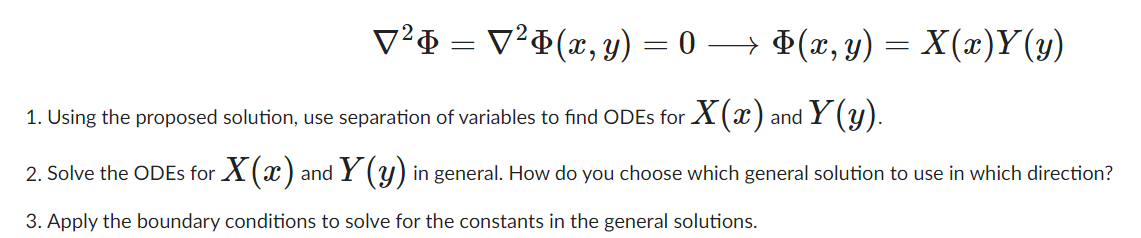

$$
\nabla^2 \Phi(x, y) = 0 \\
Y\frac{\partial^2 X}{\partial^2 x} + X\frac{\partial^2 Y}{\partial^2 y} = 0 \\
\frac{1}{X}\frac{\partial^2 X}{\partial^2 x} + \frac{1}{Y}\frac{\partial^2 Y}{\partial^2 y} = 0 \\
\frac{1}{Y}\frac{\partial^2 Y}{\partial^2 y} = -\frac{1}{X}\frac{\partial^2 X}{\partial^2 x} = -a
$$
For $Y$:
$$
\frac{\partial^2 Y(y)}{\partial^2 y} = -k^2Y(y) \\
Y(y) = c_1 \sin(ky) + c_2 \cos(ky) 
$$
For $X$:

$$
\frac{\partial^2 X(x)}{\partial^2 x} = k^2X(x) \\
X(x) = d_1 e^{kx} + d_2 e^{-kx}
$$
Put back together to get $\Phi$

$$
\Phi(x, y) = X(x)Y(y) = \left(c_1 \sin(ky) + c_2 \cos(ky)\right) \left(d_1 e^{kx} + d_2 e^{-kx}\right) \\
= b_1 \sin(ky) e^{kx} + b_2 \sin(ky)e^{-kx} + b_3 \cos(ky) e^{kx} + b_4 \cos(ky) e^{-kx}
$$


Boundaries.
$$
\Phi(x,0) = 0 \rightarrow c_2 = 0  \\
$$
This gets rid of cosine
$$
\Phi(x,a) = 0 \rightarrow \sin(ka) = 0
$$
This tells us what values $k$ can have. $ka = \pi n \rightarrow k = \frac{\pi n}{a}$
$$
\Phi(\infty, y) = 0 \rightarrow d_1 = 0
$$
So far our equation for $\Phi$ is 
$$
\Phi(x,y) = b_2\sin\left(\frac{\pi n}{a}y\right)e^{-\frac{\pi n}{a}x} 
$$0
We can apply our final boundary to this equation
$$
\Phi(0,y) = b_2 \sin \left(\frac{\pi n}{a}y\right) = V_0 \rightarrow  \\

$$
We need a forier series to do this part

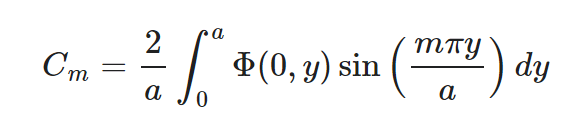



$$
C_m = \frac{2}{a} \int_0^a V_0 \sin\left(\frac{m\pi}{a}y\right) dy \\
= \frac{2V_0}{a} \int_0^a \sin\left(\frac{m\pi}{a}y\right) dy \\
=\frac{2V_0}{a} \left(\frac{a}{m\pi} - \frac{a}{m\pi}\cos\left(m\pi \right) \right) = \frac{2V_0}{m\pi} \left( 1 - \cos (m\pi) \right) \\
C_{m=2,4,6\dots} = 0 \\
C_{m=1,3,5\dots} = \frac{4V_0}{m\pi} \\
\Phi(x,y) = \sum_{n=1,3,5\dots} \frac{4V_0}{n\pi} \sin\left(\frac{n\pi}{a}y\right)e^{-\frac{n\pi}{a} x}
$$

In [ ]:
from numpy import pi, sin, exp

def phi(x, y, fourier_size, params):
    v, a = params
    result = 0
    for i in range(fourier_size):
        n = i*2 + 1
        result += 4*v/(n*pi) * sin(n*pi*y/a) * exp(- n * pi / a * x)
    
    return result

phi(0, 0, 100, (1, 1))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cm


fourier_size = 1000
V0 = 10
L = 5
params = (V0, L)

n2 = 1000
x = np.linspace(0, L+1, n2)
y = np.linspace(-1, L+1, n2)
X, Y = np.meshgrid(x, y)

def line(point):
    return (max(y)-min(y))/1000 * point + min(y)
def inv_line(y_val):
    return (y_val - min(y)) * 1000 / (max(y)-min(y))



meshout = phi(X, Y, fourier_size, params)

plt.figure(figsize=(8, 6))
sns.heatmap(meshout, cmap=cm.icefire, xticklabels=False, yticklabels=False)
plt.title('Voltage Heatmap')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(inv_line(0), color = 'black')
plt.axhline(inv_line(5), color = 'black')

plt.show()

# Laplacian - spherical coordinates

$$
V(r, \theta, \phi) = R(r)\Theta(\theta)\Phi(\phi) \\

$$

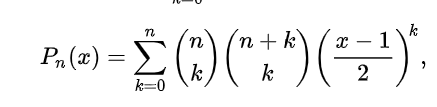

In [ ]:
from math import comb

def Legandre(n, x):
    return sum([comb(n, k) * comb(n+k, k) * ((x-1)/2)**k for k in range(0, n+1)])



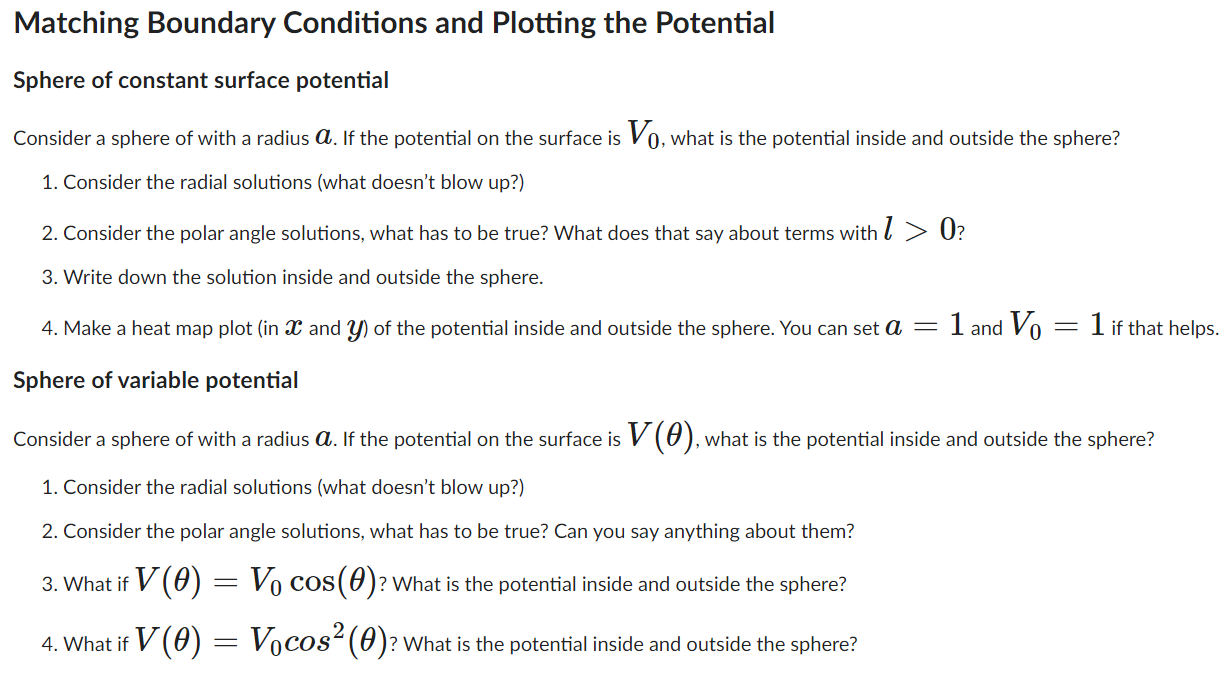

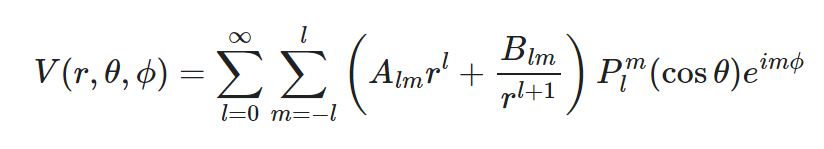

Constant surface potential: azimuthal and polar symmetry -> just looking at $V(r) = R(r)$? Not quite. We need to find when $P_l^m(\cos\theta)=1$ and $e^{im\phi}=1$ (hint: $m=0$)

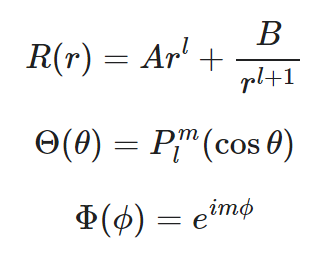

$$
R(\infty) = \sum_l^{\infty} \left( A\infty^l + \frac{B}{\infty^{l+1}} \right) = 0 \rightarrow A = 0\\
R(a) = \sum_l^{\infty} \frac{B_l}{a^{l+1}} = V_0 \\
$$

$$
P_l(\cos \theta) = 1 \rightarrow l = 0 \\
e^{im\phi} = 1 \rightarrow m = 0 \\
R(a) = \frac{B}{a} = V_0 \\
B = aV_0 \\
R(r) = \frac{aV_0}{r}
$$



In [ ]:
radius = np.linspace(0.01, 10, 1000)
a = 1
V0 = 1

plt.plot(radius, a*V0/radius);

In [ ]:
import sympy

a, v0, r = sympy.symbols('a, V0, r')
voltage = a*v0/r

E = sympy.diff(voltage, r)
rho = sympy.diff(E, r)

E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cm

def voltage(x, y, params):
    v0, a = params
    r = np.sqrt(x**2 + y**2)
    
    return np.where(r < a, v0, v0 * a / r)

V0 = 1
L = 1
params = (V0, L)

n2 = 5000
x = np.linspace(-4, 4, n2)
y = np.linspace(-4, 4, n2)
X, Y = np.meshgrid(x, y)

meshout = voltage(X, Y, params)

plt.figure(figsize=(8, 6))
sns.heatmap(meshout, cmap=cm.rocket, xticklabels=False, yticklabels=False)
plt.title('Voltage Heatmap')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


Sphere of variable potential

No radial component? Na don't be crazy.



In [ ]:
def voltage(X, Y, params):
    r = np.sqrt(X**2 + Y**2)
    theta = np.arctan(Y/X)

    V0, a = params
    return np.where(r<a, V0/a * r * np.cos(theta), V0 * a**2 / r**2 * np.cos(theta))

meshout = voltage(X, Y, params)

plt.figure(figsize=(8, 6))
sns.heatmap(meshout, cmap=cm.rocket, xticklabels=False, yticklabels=False)
plt.title('Voltage Heatmap')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()



# Week 7 - method of relaxation

I have never relaxed once, ever

# Week 9 - Waves

Let's wave it

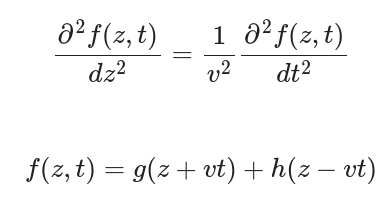

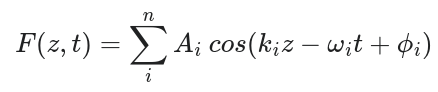

This second equation is a solution since the second derivative works out. Let's get into the code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

# professor's code

# Parameters
A = 1.0           # Amplitude
lambda_ = 2.0     # Wavelength (underscore needed because lambda is a reserved word)
f = 1.0           # Frequency in Hz
phi = 0.0         # Phase constant in radians

k = 2 * np.pi / lambda_
omega = 2 * np.pi * f

# Define the wave equation
def wave(x, t):
    return A * np.sin(k * x - omega * t + phi)

# Generate x and t values
x = np.linspace(0, 4 * lambda_, 100)
t = np.linspace(0, 2/f, 100)

X, T = np.meshgrid(x, t)  # Create a meshgrid for x and t values
Y = wave(X, T)  # Compute the amplitude for every combination of x and t

# Plot amplitude vs. position for different times
times_to_plot = [0, 0.25/f, 0.5/f, 0.75/f]  # Chosen specific times to show one complete cycle

plt.figure(figsize=(10, 6))

for plot_time in times_to_plot:
    plt.plot(x, wave(x, plot_time), label=f't = {plot_time:.2f} s')

plt.title("Amplitude vs. Position at Different Times")
plt.xlabel('Position (x)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)



In [ ]:
# Selected positions to plot
positions_to_plot = [0, lambda_/4, lambda_/2, 3*lambda_/4]

plt.figure(figsize=(10, 6))

for pos in positions_to_plot:
    plt.plot(t, wave(pos, t), label=f'x = {pos:.2f} units')

plt.title("Amplitude vs. Time at Selected Positions")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, T, Y, cmap='inferno')  # Using viridis colormap for better clarity
ax.set_title("3D Plot of Traveling Wave in Space and Time")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Time (t)")
ax.set_zlabel("Amplitude")
ax.view_init(elev=30, azim=-60)  # Adjust viewing angle for better visualization

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(Y, aspect='auto', origin='lower', extent=[x.min(), x.max(), t.min(), t.max()], cmap='inferno')
plt.colorbar(label="Amplitude")
plt.title("2D Heatmap of Traveling Wave in Space and Time")
plt.xlabel("Position (x)")
plt.ylabel("Time (t)")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, wave(x, 0))  # Initial plot (t=0)
ax.set_ylim([-A, A])  # Setting the y limits to the amplitude range
ax.set_xlabel('Position (x)')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title("Amplitude vs. Position over Time")

def update(frame):
    line.set_ydata(wave(x, frame))  # Update the y data of the line plot for the current time frame
    ax.set_title(f"Amplitude vs. Position at t = {frame:.2f} s")
    return line,

# Animate over the given times using FuncAnimation
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=50)
plt.close(fig) ## needed to stop another static image from being displayed

# Display the animation in the notebook
HTML(ani.to_jshtml())

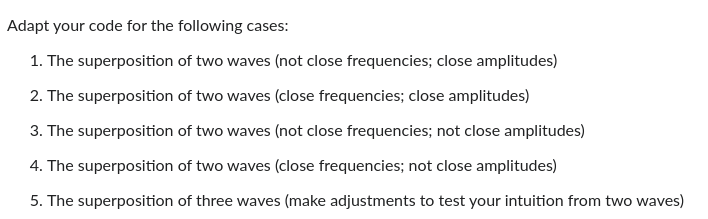

Here's the basics of the code we're using

```Python
# Parameters
A = 1.0           # Amplitude
lambda_ = 2.0     # Wavelength (underscore needed because lambda is a reserved word)
f = 1.0           # Frequency in Hz
phi = 0.0         # Phase constant in radians

k = 2 * np.pi / lambda_
omega = 2 * np.pi * f

# Define the wave equation
def wave(x, t):
    return A * np.sin(k * x - omega * t + phi)

# Generate x and t values
x = np.linspace(0, 4 * lambda_, 100)
t = np.linspace(0, 2/f, 100)

X, T = np.meshgrid(x, t)  # Create a meshgrid for x and t values
Y = wave(X, T)  # Compute the amplitude for every combination of x and t
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline
from numpy import pi, sin

# Wave 1 is constant.
amp1, wavelen1, freq1, phase1 = 1, 2, 1, 0
ref_wave_params = [amp1, wavelen1, freq1, phase1]

# Wave 2 parameters are accessed from array
wave_param_options = []

# 0 Different frequencies
wave_param_options.append([1.05, 2, 0.5, 0])

# 1 Similar wave
wave_param_options.append([1.05, 2, 1.05, 0])

# 2 Different frequencies, amplitudes
wave_param_options.append([0.5, 2, 0.5, 0])

# 3 Different amplitudes
wave_param_options.append([0.5, 2, 1.05, 0.5])

# 4 Backwards wave
wave_param_options.append([0.4, 2, -3, 0])

def wave(x, t, params):
    A, lambda_, f, phi = params
    k = 2*pi/lambda_ # wave number
    omega = 2*pi*f
    return A *sin(k*x-omega*t+phi)

x = np.linspace(0, 4*wavelen1, 100)
t = np.linspace(0, 2/freq1, 100)

X, T = np.meshgrid(x, t)
wave1 = wave(X, T, ref_wave_params)
wave2 = wave(X, T, wave_param_options[2])
superposition = wave1+wave2

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, T, superposition, cmap='inferno')  # Using viridis colormap for better clarity
ax.set_title("3D Plot of Traveling Wave in Space and Time")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Time (t)")
ax.set_zlabel("Amplitude")
ax.view_init(elev=30, azim=-60)  # Adjust viewing angle for better visualization

In [ ]:
# Create a heatmap
import seaborn as sns

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
sns.heatmap(superposition, cmap=sns.cm.icefire, ax=ax, xticklabels=False, yticklabels=False)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Time (t)");


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

i = 2

wave1 = wave(x, 0, ref_wave_params)
wave2 = wave(x, 0, wave_param_options[i])
wave3 = wave(x, 0, wave_param_options[4])

# Initial plot (t=0)
wave1_plt, = ax.plot(x, wave1, label = 'ref wave', color='red', alpha=0.5) 
wave2_plt, = ax.plot(x, wave2, label = 'test wave', color='black', alpha=0.5)
wave3_plt, = ax.plot(x, wave3, label = 'test wave', color='black', alpha=0.5)
superposition, = ax.plot(x, wave1 + wave2 + wave3, label = 'result', color='blue')  

ax.set_ylim([-2*amp1, 2*amp1])  # Setting the y limits to the amplitude range
ax.set_xlabel('Position (x)')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title("Amplitude vs. Position over Time")
plt.legend()

def update(frame):
    wave1 = wave(x, frame, ref_wave_params)
    wave2 = wave(x, frame, wave_param_options[i])
    wave3 = wave(x, frame, wave_param_options[4])
    wave1_plt.set_ydata(wave1)  # Update the y data of the line plot for the current time frame
    wave2_plt.set_ydata(wave2)
    wave3_plt.set_ydata(wave3)
    superposition.set_ydata(wave1+wave2+wave3)
    ax.set_title(f"Amplitude vs. Position at t = {frame:.2f} s")
    return wave1_plt, wave2_plt, wave3_plt, superposition

# Animate over the given times using FuncAnimation
ani = FuncAnimation(fig, update, frames=t, blit=True, interval=50)
plt.close(fig) ## needed to stop another static image from being displayed

# Display the animation in the notebook
HTML(ani.to_jshtml())

# Week 10 - Fourier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0,2,1000)
omega1 = 100
omega2 = 105
omega3 = 1000

A1 = 1
A2 = 0.9
A3 = 0.1

y1 = A1*np.cos(omega1*t)

y2 = A2*np.cos(omega2*t)
y3 = A2*np.cos(omega3*t)
y4 = A3*np.cos(omega2*t)
y5 = A3*np.cos(omega3*t)

CloseAmpCloseFreq = y1+y2
CloseAmpFarFreq = y1+y3
FarAmpCloseFreq = y1+y4
FarAmpFarFreq = y1+y5

fig = plt.figure(figsize=(16,8))


plt.plot(t,CloseAmpCloseFreq+6, label='Close Amp; Close Freq')
plt.plot(t,CloseAmpFarFreq+2, label='Close Amp; Far Freq')
plt.plot(t,FarAmpCloseFreq-2, label='Far Amp; Close Freq')
plt.plot(t,FarAmpFarFreq-6, label='Far Amp; Far Freq')

plt.legend();

How to do forier transform:

1. Find the offset term

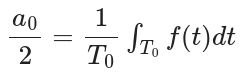

This is just the average of the original function over one period.

2. Find the coefficients $a_n$

This can be done using fourier's trick. Again, this is actually just the average in disguise. For orthogonal functions, integrating over their period/orthogonal range yields zero, so any component of the function which isn't orthogonal ends up yielding the overlap, thus $a_n$



Lets try this on the square wave

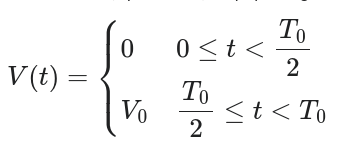

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def V_square(t, params):
    V0, T0 = params
    return np.where(t%T0 < T0/2, 0, V0)

V0 = 5
T0 = 2
params = [V0, T0]

t = np.linspace(0, T0-0.01, 100)
plt.plot(t, V_square(t, params));

Lets integrate with our sine and cosine functions

$$
\int_0^{T_0} V(t)\sin(n\omega t)dt = \int_0^{T_0/2} 0*\sin(n \omega t) dt + \int_{T_0/2}^{T_0} V_0\sin(n\omega t)dt\\
=V_0 \int_{T_0/2}^{T_0} \sin(n\frac{2\pi}{T_0}t) dt
$$

In [ ]:
from sympy import * 
n, T0, t, V0, an, bn = symbols('n T0 t V0 a_n b_n')
integrand = V0*cos(n*2*pi/T0 * t)
#display(integrand)

result = (2/T0) * integrate(integrand, (t, T0/2, T0)).args[0][0]
display(Eq(an, simplify(result)))

integrand2 = V0*sin(n*2*pi/T0 * t)
#display(integrand2)

result2 = (2/T0) * integrate(integrand2, (t, T0/2, T0)).args[0][0]
display(Eq(bn, simplify(result2)))

This becomes

$$
\sin(\pi n) = 0 \rightarrow a_n = 0\\
b_n = \frac{V_0}{\pi n} \left(\left(-1\right)^{n} -1\right)\\
b_{n=1,3,5\dots} = \frac{-2V_0}{\pi n}
$$

Also, don't forget $a_0/2=V_0/2$

In [ ]:
from numpy import sin, pi

def fourier(t, fourier_size, params):
    V0, T0 = params
    return V0/2 + sum([np.where(n%2==1, -2*V0/(n*pi)*sin(n*2*pi/T0*t), 0) for n in range(1,fourier_size+1)])

V0 = 5
T0 = 2
params = [V0, T0]

t = np.linspace(0, 3*T0, 1000)
plt.plot(t, V_square(t, params))
plt.plot(t, fourier(t, 100, params));

In [ ]:
import numpy as np
from numpy import exp, real, imag, pi 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad, trapezoid

# Compute the Fourier coefficient
def compute_cn(v, n, omega, num_points=10000):
    # Create an array of time points
    T = 2*pi/omega
    t = np.linspace(0, T, num_points)
    
    # Evaluate the integrands
    integrand = np.zeros_like(t, dtype=complex)
    for i, ti in enumerate(t):
        integrand[i] = v(ti) * np.exp(-1j * n * omega * ti)
    #integrand = np.array([v(ti) * np.exp(-1j * n * omega * ti) for ti in t])
    
    # Perform the trapezoidal integration
    integral = trapezoid(integrand, t)
    
    # Compute the Fourier coefficient
    return integral / T


#def compute_cn(v, n, omega):
#    integrand_real = lambda t: real(v(t) * exp(-1j*n*omega*t))
#    integrand_imag = lambda t: imag(v(t) * exp(-1j*n*omega*t))
#
#    return trapezoid(integrand_real, 0, T, full_output=1)[0]/T + 1j*trapezoid(integrand_imag, 0, T, full_output=1)[0]/T

def get_fourier(tvals, cn_vals, omega):
    '''
    cn_vals are [n, cn]
    '''
    fseries = np.zeros(shape=(len(cn_vals), len(tvals)), dtype=complex)
    for n, cn in cn_vals:
        for t, tval in enumerate(tvals):
            fseries[n, t] = cn * exp(1j*n*omega*tval)
    fapprox = np.sum(fseries, axis=0)

    return fapprox, fseries

# Fourier series expansion using complex form
def complex_fourier_series_expansion(v, tvals, T, N):
    '''
    Now generalized for complex valued functions!
    '''

    omega = 2*pi / T
    
    cn_vals = []
    for n in range(0, N+1):
        cn = compute_cn(v, n, omega)
        cn_vals.append([n, cn])
        if n != 0:
            cn = compute_cn(v, -n, omega)
            cn_vals.append([-n, cn])

    approximation, fseries = get_fourier(tvals, cn_vals, omega)
    return approximation, fseries, cn_vals

# Define the square wave signal
T = 2*pi  # Period

def v(t):
    return np.where(t%(T) < T/2, signal.sawtooth(t), signal.square(t))

tval = np.linspace(0, 3*T, 1000)

signal_approx, fseries, cn_vals = complex_fourier_series_expansion(v, tval, T, 10)

plt.plot(tval, v(tval))
plt.plot(tval, signal_approx.real)
plt.show()

In [ ]:
for fseries_item in fseries[1:]:
    plt.plot(tval, fseries_item.real)

In [ ]:
from numpy import sin, cos, pi

T = 2*pi

def v(x):
    return signal.square(x) + 1j * signal.sawtooth(x)

x = np.linspace(0, 3*T, 10000)
test_signal = v(x)

fig, [ax0, ax1] = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)

ax0.plot(x, test_signal.real)
ax0.plot(x, test_signal.imag)
ax1.plot(test_signal.real, test_signal.imag)
plt.tight_layout()
plt.show()


In [ ]:
#signal_approx, fseries, cn_vals = complex_fourier_series_expansion(v, x, T, 30)

def plot_signal_and_approx(test_signal, signal_approx, x, invert_x=False, invert_y=False):

    fig, [ax0, ax1] = plt.subplots(1, 2)
    fig.set_figheight(4)
    fig.set_figwidth(10)

    ax0.plot(x, test_signal.real, label = 'original (real)')
    ax0.plot(x, test_signal.imag, label = 'original (imag)')
    ax1.plot(test_signal.real, test_signal.imag, label = 'original')


    ax0.plot(x, signal_approx.real)
    ax0.plot(x, signal_approx.imag)
    ax1.plot(signal_approx.real, signal_approx.imag, color='red')

    ax0.legend()
    ax1.legend()
    if invert_x:
        ax1.invert_xaxis()
    if invert_y:
        ax1.invert_yaxis()
    plt.tight_layout()
    plt.show()

#plot_signal_and_approx(test_signal, signal_approx, x)

In [ ]:
for n, cn in cn_vals:
    plt.scatter(n, cn.real, color='red')
    plt.scatter(n, cn.imag, color='green')

In [ ]:
SVGMobject('batman')

In [ ]:
import svgpathtools
from numpy import modf

def parse_svg_path(file_path):
    # Load the SVG paths
    paths, _ = svgpathtools.svg2paths(file_path)
    # Store path segments as functions of t
    parametric_segments = []
    for path in paths:
        for segment in path:
            if isinstance(segment, svgpathtools.Line):
                # Straight line segment
                def line_segment(t, start=segment.start, end=segment.end):
                    return (1 - t) * start + t * end
                parametric_segments.append(line_segment)
            elif isinstance(segment, svgpathtools.CubicBezier):
                # Cubic Bezier curve
                def cubic_bezier(t, start=segment.start, control1=segment.control1,
                                 control2=segment.control2, end=segment.end):
                    return ((1 - t) ** 3) * start + 3 * ((1 - t) ** 2) * t * control1 + \
                           3 * (1 - t) * (t ** 2) * control2 + (t ** 3) * end
                parametric_segments.append(cubic_bezier)
            elif isinstance(segment, svgpathtools.QuadraticBezier):
                # Quadratic Bezier curve
                def quadratic_bezier(t, start=segment.start, control=segment.control,
                                     end=segment.end):
                    return ((1 - t) ** 2) * start + 2 * (1 - t) * t * control + (t ** 2) * end
                parametric_segments.append(quadratic_bezier)
    return parametric_segments


def parametric_from_path(paths, flipy = False):
    x0 = paths[0](0)
    def parametric_func(x):
        x = x % 1
        param_in, select = modf(x*len(paths))
        return (paths[int(select)](param_in) - x0) * (-1)**flipy
        
    return parametric_func

seg = parse_svg_path('/workspaces/cautious-adventure/my stuff/FS24/PHY 415/1293453.svg')
V = parametric_from_path(seg)

In [ ]:
x = np.linspace(0, 1, 100000)
y = np.array([V(xi) for xi in x])

plt.scatter(y.real, y.imag, s=1);


In [ ]:
plt.plot(x, y.real)
plt.plot(x, y.imag)

In [ ]:
approx, fseries, cn_vals = complex_fourier_series_expansion(V, x, 1, 30)

plot_signal_and_approx(y, approx, x)

In [ ]:
seg = parse_svg_path('/workspaces/cautious-adventure/my stuff/FS24/PHY 415/my_name.svg')
V = parametric_from_path(seg, flipy=True)
x = np.linspace(0, 1, 100000)
y = np.array([V(xi) for xi in x])

approx, fseries, cn_vals = complex_fourier_series_expansion(V, x, 1, 30)
plot_signal_and_approx(y, approx, x, invert_x = True)

In [ ]:
fig, ax = plt.subplots()
line = ax.plot(approx.real, approx.imag)

def update(frame):
    line.set_xdata()
    line.set_ydata(wave(x, frame))  # Update the y data of the line plot for the current time frame
    ax.set_title(f"Amplitude vs. Position at t = {frame:.2f} s")
    return line,

ani = FuncAnimation(fig, update, frames=, blit=True, interval=50)
plt.close(fig) ## needed to stop another static image from being displayed

# Display the animation in the notebook
HTML(ani.to_jshtml())

# Week 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the functions to create signals
def simple_signal(t, A=1, f=1):
    """Creates a simple sinusoidal signal."""
    return A*np.sin(2 * np.pi * f* t)

def summed_signal(t, A, f):
    """Creates a more complex signal with multiple frequencies."""
    return A[0] * np.sin(2 * np.pi * f[0]*t) + A[1] * np.sin(2 * np.pi * f[1]*t) + A[2]*np.sin(2 * np.pi * f[2]*t)

def noisy_signal(t, A=1, f=1, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t)) 
    return simple_signal(t, A, f) + noise

def noisy_summed_signal(t, A, f, B=1):
    """Creates a simple signal with random noise."""
    random.seed(42) # seed keeps the random numbers the same each time
    noise = B*np.random.normal(0, 1, len(t))
    return summed_signal(t, A, f) + noise

In [ ]:
# Set the sample rate and time
dt = 0.0005  # Sampling frequency
T0 = 0.1 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

fsimple = 10
Asimple = 1

f = np.array([10, 15, 30])
A = np.array([3, 2, 1])

simple = simple_signal(t, Asimple, fsimple)
summed = summed_signal(t, A, f)

simple_noise = 0.1
summed_noise = 0.8

noisy = noisy_signal(t, Asimple, fsimple, simple_noise)
noisy_summed = noisy_summed_signal(t, A, f, summed_noise)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, simple)
plt.title('Simple Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, summed)
plt.title('Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, noisy)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, noisy_summed)
plt.title('Noisy Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()

In [ ]:
import numpy as np
from numpy import exp, real, imag, pi 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad, trapezoid

def compute_cn(vi, t, n, omega):
    T = 2*pi/omega
    vi = vi[t<T]
    t = t[t<T]
    integrand = vi[t<T] * exp(-1j * n * omega * t)
    integral = trapezoid(integrand, t)
    return integral / T

def get_fourier(tvals, cn_vals, omega):
    '''
    cn_vals are [n, cn]
    '''
    fseries = np.zeros(shape=(len(cn_vals), len(tvals)), dtype=complex)
    for n, cn in cn_vals:
        for t, tval in enumerate(tvals):
            fseries[n, t] = cn * exp(1j*n*omega*tval)
    fapprox = np.sum(fseries, axis=0)

    return fapprox, fseries

def complex_fourier_series_expansion(vout, tvals, T, N):
    '''
    Now generalized for complex valued functions!
    '''
    omega = 2*pi / T
    cn_vals = []


    for n in range(0, N+1):
        cn = compute_cn(vout, tvals, n, omega)
        cn_vals.append([n, cn])
        if n != 0:
            cn = compute_cn(vout, tvals, -n, omega)
            cn_vals.append([-n, cn])

    approximation, fseries = get_fourier(tvals, cn_vals, omega)
    return approximation, fseries, cn_vals

In [ ]:
from functools import partial

f = np.array([10, 15, 30])
A = np.array([3, 2, 1])
noisy_test_signal = partial(noisy_summed_signal, A=A, f=f)

dt = 0.0005  # Sampling frequency
T0 = 0.2 # Signal period
T = 3.0*T0  # Sample time length
t = np.arange(0, T, dt)  # Time points

signal_output = noisy_test_signal(t)

signal_approx, fseries, cn_vals = complex_fourier_series_expansion(signal_output, t, T0, N=100)
print(len(t))

In [ ]:
plt.plot(t, noisy_test_signal(t))
plt.plot(t, signal_approx.real)

In [ ]:
from numpy import pi, exp, real, imag

cn_vals_ar = np.array(cn_vals)
n = cn_vals_ar[:,0].real
cn = cn_vals_ar[:,1]

def n_to_freq(n, T0):
    f1 = 1/T0
    return f1*n    

f = n_to_freq(n, T0)

plt.scatter(f, abs(real(cn)), s=1,color='red')
plt.scatter(f, abs(imag(cn)), s=1, color='blue')

plt.ylabel('amplitude')
plt.xlabel('frequency')

In [ ]:
exp(1j * 2 * pi * f * t)

In [ ]:
import pandas as pd
df = pd.DataFrame({'Amplitude': cn, 'Frequency': f})

relevant = df[abs(imag(df['Amplitude'])) > 0.3]
print(relevant)

result = np.zeros(len(t), dtype=complex)

for amp, freq in relevant.values:
    result += amp * exp(1j * 2 * pi * freq * t)

plt.plot(t, result.real)
plt.plot(t, result.imag)

# Week 12

Planet redshift lab

<Axes: xlabel='time', ylabel='amplitude'>

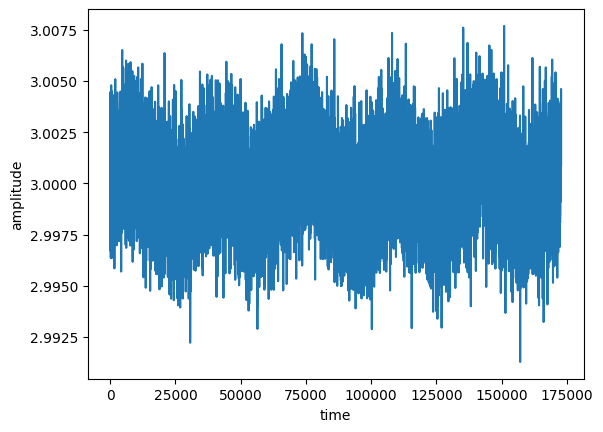

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obs1 = pd.read_csv('obs1.csv', names=['time', 'amplitude'])
obs2 = pd.read_csv('obs2.csv', names=['time', 'amplitude'])
obs3 = pd.read_csv('obs3.csv', names=['time', 'amplitude'])

sns.lineplot(data=obs1, x='time', y='amplitude')


Power Spectrum    26.538059
Fourier Freq       0.000029
Name: 5, dtype: float64

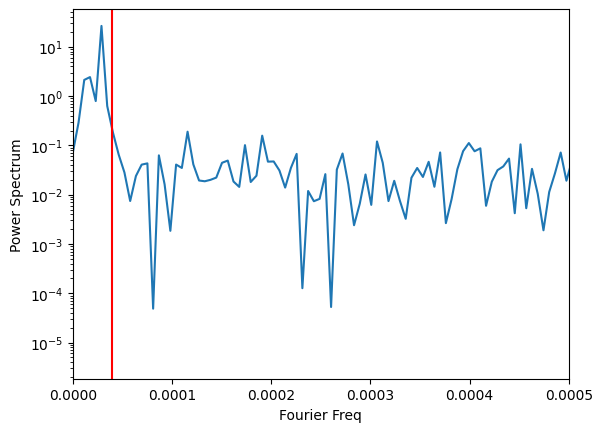

In [108]:
import numpy as np
from numpy.fft import fft, fftfreq, ifft

dt = obs1['time'][1] - obs1['time'][0]

obs1_fourier = fft(obs1['amplitude']-3)
power_spectrum = abs(obs1_fourier)**2

obs1_fourier_freq = fftfreq(len(obs1), dt)

pos_power_spectrum = power_spectrum[obs1_fourier_freq > 0]
pos_freq = obs1_fourier_freq[obs1_fourier_freq > 0]

fourier_results = pd.DataFrame({'Power Spectrum':power_spectrum, 'Fourier Freq':obs1_fourier_freq})

sns.lineplot(data=fourier_results, x='Fourier Freq', y='Power Spectrum')
plt.yscale('log')
plt.xlim(0, 5e-4)
plt.axvline(4e-5, color='red')

fourier_results.loc[fourier_results['Power Spectrum'].idxmax()]

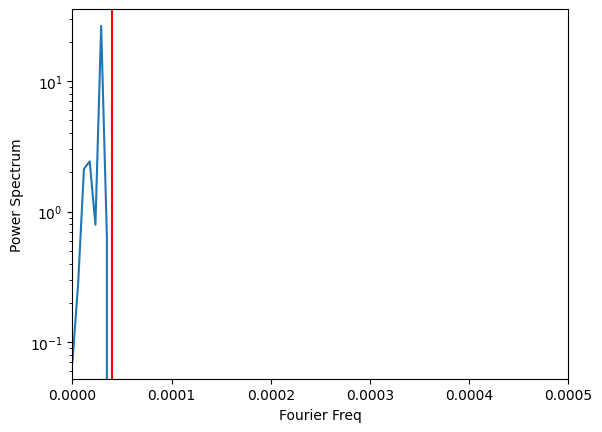

In [109]:
fourier_results.loc[abs(fourier_results['Fourier Freq']) > 4e-5, ['Power Spectrum']] = 0
sns.lineplot(data=fourier_results, x='Fourier Freq', y='Power Spectrum')
plt.yscale('log')
plt.xlim(0, 5e-4)
plt.axvline(4e-5, color='red')

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: xlabel='time', ylabel='cleaned signal'>

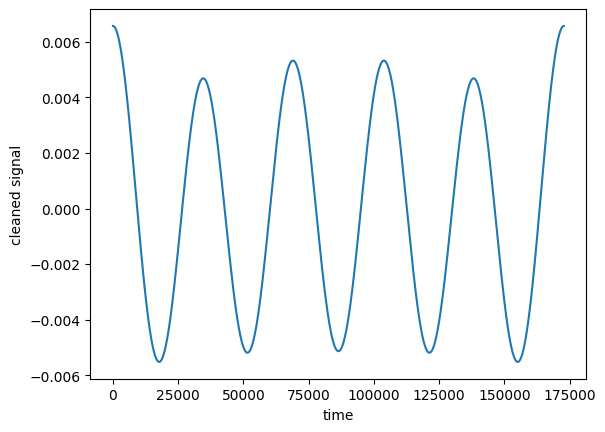

In [111]:
cleaned_signal = ifft(fourier_results['Power Spectrum'])

obs1['cleaned signal'] = cleaned_signal
sns.lineplot(data = obs1, x='time', y='cleaned signal')

# Week 13 - Random

6%6

In [230]:
9%6

3

In [231]:
np.random.randint(8, 9)

8

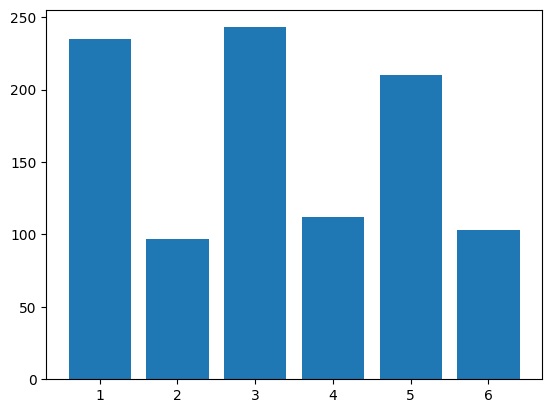

In [232]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def weighted_die():
    i = np.random.randint(1, 10)
    if i < 7:
        return i
    else:
        return i%6*2-1
    
a = [0, 0, 0, 0, 0, 0]
for roll in range(1000):
    a[weighted_die()-1] += 1

plt.bar([1,2,3,4,5,6], a);

<Axes: >

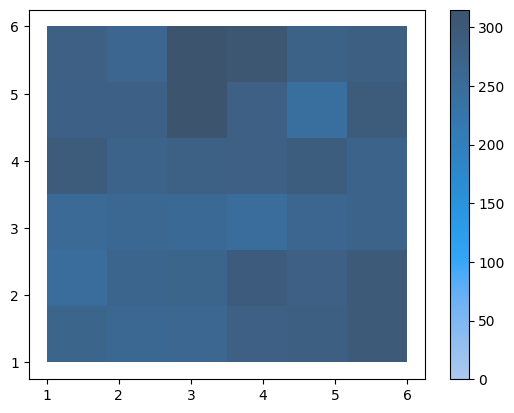

In [233]:
import seaborn as sns

np.random.seed(2)

two_dice = np.array([(np.random.randint(1, 7), np.random.randint(1, 7)) for i in range(10000)])

sns.histplot(x=two_dice[:, 0], y=two_dice[:, 1], bins=6, cbar=True)


In [234]:
Bi_half_life = 46 #min
Pb_half_life = 3.3*60
Tl_half_life = 2.2/60

Bi_decay_constant = np.log(2)/Bi_half_life
Pb_decay_constant = np.log(2)/Pb_half_life
Tl_decay_constant = np.log(2)/Tl_half_life

Bi_decay_constant

np.float64(0.015068416968694463)

$N(t) = N_0 e^{-\lambda t}$

$P(\text{decay in 1 hour}) = 1-e^{-\lambda (\text{1 hour})} $

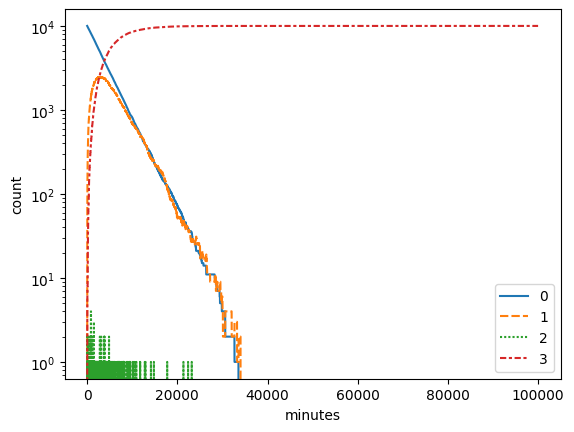

In [238]:
Bi_decay_prob = 1-np.exp(-Bi_decay_constant*1/60)
Pb_decay_prob = 1-np.exp(-Pb_decay_constant*1/60)
Tl_decay_prob = 1-np.exp(-Tl_decay_constant*1/60)
becomes_Tl_prob = .0209

np.random.seed(3)

def draw_Bi_decay():
    decay = True if np.random.rand() <= Bi_decay_prob else False
    if decay:
        return 1 if np.random.rand() <= .0209 else 2
    else: return decay

def draw_Pb_decay():
    return True if np.random.rand() <= Pb_decay_prob else False
def draw_Tl_decay():
    return True if np.random.rand() <= Tl_decay_prob else False

t = np.arange(0, 100000) #minutes
timeline = np.zeros((len(t),4), dtype=int)

timeline[0,0] = 10000

for i, timestep in enumerate(timeline):
    if i+1 != len(timeline):
        Bi213_decays = np.array([draw_Bi_decay() for Bi213 in range(timestep[0])])
        new_Thl = sum(Bi213_decays==1)
        new_Pb = sum(Bi213_decays==2)

        new_Bi_Tl = sum([draw_Tl_decay() for Tl in range(timestep[2])])
        new_Bi_Pb = sum([draw_Bi_decay() for Pb209 in range(timestep[1])])

        timeline[i+1] = timestep + (-new_Pb-new_Thl, new_Pb-new_Bi_Pb, new_Thl-new_Bi_Tl, new_Bi_Pb+new_Bi_Tl)


sns.lineplot(data=timeline)
plt.xlabel('minutes')
plt.ylabel('count')
plt.yscale('log')

In [ ]:
timeline[:,2]

array([0, 2, 3, 2, 2, 3, 3, 1, 3, 3, 5, 2, 3, 1, 1, 2, 2, 5, 4, 1, 3, 2,
       2, 3, 2, 5, 3, 2, 4, 3, 1, 2, 1, 1, 2, 2, 2, 3, 1, 0, 2, 1, 2, 1,
       0, 1, 1, 0, 0, 3, 4, 2, 1, 3, 2, 0, 1, 3, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 4, 0, 1, 0, 1, 1, 4, 1, 2,
       1, 1, 3, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
new_Bi_Pb = sum([draw_Bi_decay() for Pb209 in range(timestep[1])])


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
sum(np.array([0, 1, 2]) == 1)

np.int64(1)

## Monte-Carlo Integration

An integral is equal to the area under a curve. Let's just find the proportion of points under vs over the curve

(0.0, 1.0)

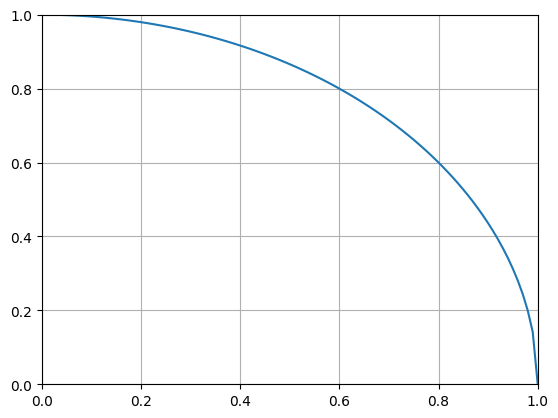

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, pi

def f(x):
    return sqrt(1-x**2)

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)


(0.0, 1.0)

c:\Users\andre\OneDrive\Documents\koolis\cautious-adventure\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\andre\OneDrive\Documents\koolis\cautious-adventure\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


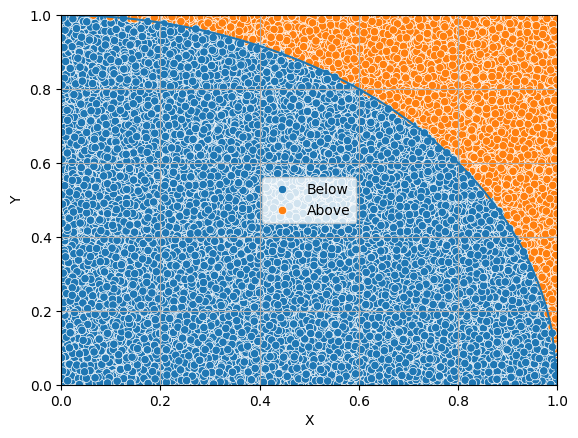

In [66]:
import seaborn as sns
import pandas as pd

np.random.seed(1001313485)

drops = 1000000
drop_array = np.random.rand(drops*2).reshape(drops,2)

df = pd.DataFrame({'X':drop_array[:,0], 'Y':drop_array[:,1]})

def is_above(row):
    x, y = row
    return 'Above' if f(x) < y else 'Below'

df['is above'] = df.apply(is_above, axis=1)

sns.scatterplot(data=df, x='X', y='Y', hue='is above')
sns.lineplot(x=x, y=f(x))
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)


In [68]:
fraction = sum(df['is above'] == 'Below')/drops
fraction*4
# Area = pi*r^2 = pi

3.143548

convergence successful
std = 1.4033091693812653e-06


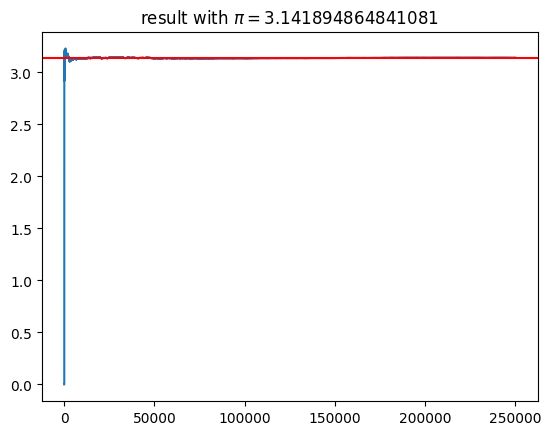

In [212]:
def prop_to_val(p):
    return 4*p

solved = False
i = 0
tol = 1e-5
trial_size = 1000000

array = np.zeros((trial_size, 4))

while solved == False and i < trial_size:
    point = np.random.rand(2)
    above = 0 if f(point[0]) < point[1] else 1
    array[i, :3] = [*point, above]
    array[i, 3] = array[:i+1, 2].mean() # proportion 


    if i>trial_size/4:
        std = array[int(trial_size/4)-10:i, 3].std()
        solved = True if std < tol else False
    
    i+=1

if solved==False:
    print('failed to converge')
else:
    print('convergence successful')

plt.plot(prop_to_val(array[:i, 3]))
plt.axhline(pi, color='red');
plt.title(rf'result with $\pi=${prop_to_val(array[i-1, 3])}')
print(f'std = {std}')

In [215]:
(np.array([0, 1])*2-1)

array([-1,  1])

convergence successful
std = 2.4347201256543162e-06


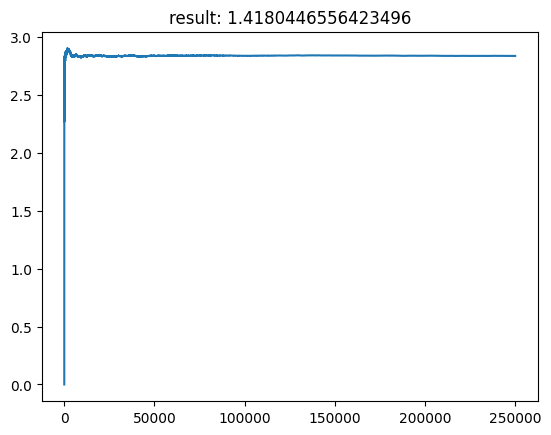

In [322]:
from numpy import sin

def func(x):
    sin(1/(x(2-x)))**2 

func = sin
xrange = 2
trial_size = 1000000
tol = 1e-5

def get_point_val(p0, func):
    x, y = p0
    if func(x) < 0:
        return -1 if func(x)<=y else 0
    else:
        return 1 if func(x)>=y else 0

def areaf(func, xrange):
    x = np.linspace(0, xrange, 1000000)
    ymin = func(x).min()
    yrange = func(x).max()-func(x).min()
    return ymin, yrange, xrange*yrange

ymin, yrange, area = areaf(func, xrange)
array = np.zeros((trial_size, 4))


solved = False
i = 0
while solved == False and i < trial_size:
    point = (np.random.rand()*xrange, ymin + yrange*np.random.rand())
    val = get_point_val(point, sin)
    
    array[i, :3] = [*point, val]
    array[i, 3] = array[:i+1, 2].mean() # proportion 


    if i>trial_size/4:
        std = array[int(trial_size/4)-10:i, 3].std()
        solved = True if std < tol else False
    
    i+=1

if solved==False:
    print('failed to converge')
else:
    print('convergence successful')

plt.plot(prop_to_val(array[:i, 3]))
plt.title(rf'result: {area*array[i-1, 3]}')
print(f'std = {std}')